In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

In [2]:
#Load CSV into DataFrame
df = pd.read_csv("C:\\Users\\Sanket\\Desktop\\PGP AIML\\Supervised Learning\\audit_data\\audit_risk.csv")
df.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [3]:
#Get count of each attribute to see if there are any missing values
df.count()

Sector_score      776
LOCATION_ID       776
PARA_A            776
Score_A           776
Risk_A            776
PARA_B            776
Score_B           776
Risk_B            776
TOTAL             776
numbers           776
Score_B.1         776
Risk_C            776
Money_Value       775
Score_MV          776
Risk_D            776
District_Loss     776
PROB              776
RiSk_E            776
History           776
Prob              776
Risk_F            776
Score             776
Inherent_Risk     776
CONTROL_RISK      776
Detection_Risk    776
Audit_Risk        776
Risk              776
dtype: int64

In [4]:
#Describe each attributes to see if datatypes of each attribute is as expected
df.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [5]:
#Checking Location ID why it is not numeric
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

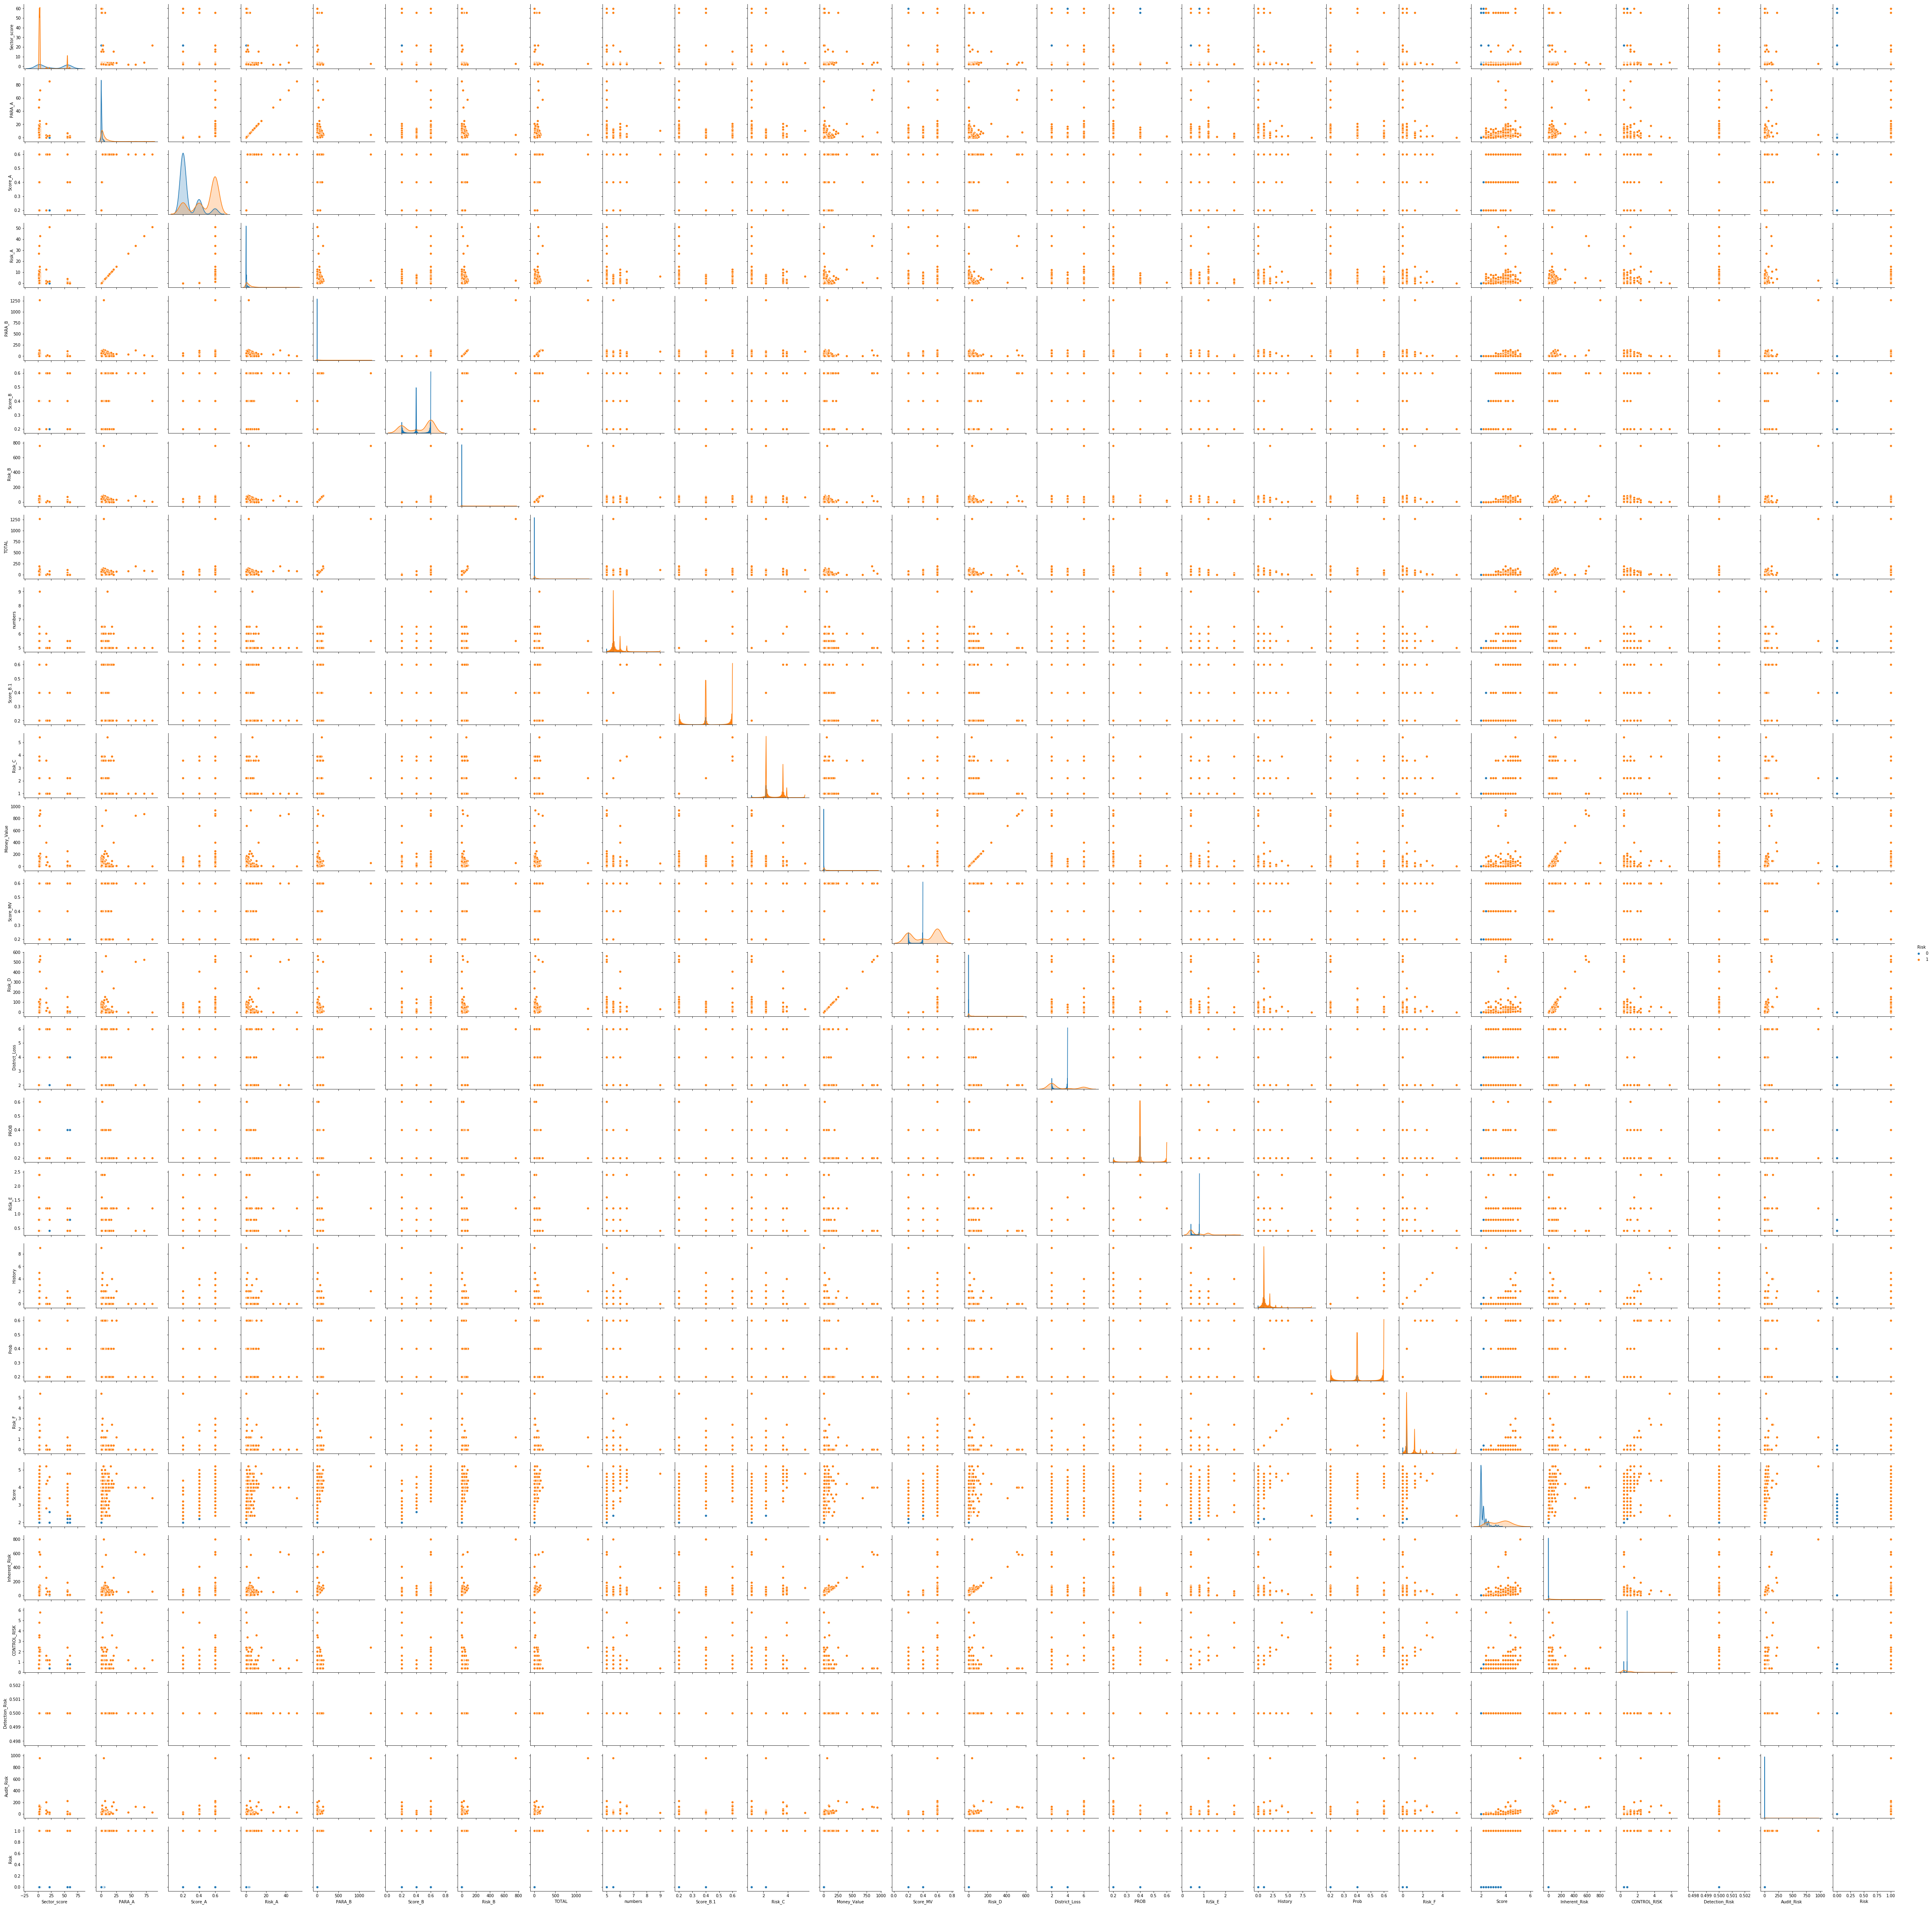

In [6]:
#We can see that there are few non-numeric values in Location ID. But, anyways, we would have to perform one-hot encoding to create dummy columns
#But before doing that let's study pairplot of the Data before adding new dummy columns
sns.pairplot(df, hue='Risk')
plt.show()

In [7]:
#Performing one-hot encoding to create dummy columns
df = pd.get_dummies(df, columns=['LOCATION_ID'])

In [8]:
#Let's check the new DataFrame
df.head(10)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,LOCATION_ID_43,LOCATION_ID_44,LOCATION_ID_5,LOCATION_ID_6,LOCATION_ID_7,LOCATION_ID_8,LOCATION_ID_9,LOCATION_ID_LOHARU,LOCATION_ID_NUH,LOCATION_ID_SAFIDON
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0,0,0,0,0,0,0,0,0,0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0,0,0,1,0,0,0,0,0,0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
6,3.89,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,0.2,...,0,0,0,0,1,0,0,0,0,0
7,3.89,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,0.4,...,0,0,0,0,0,1,0,0,0,0
8,3.89,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,0.4,...,0,0,0,0,0,1,0,0,0,0
9,3.89,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,0.2,...,0,0,0,0,0,1,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


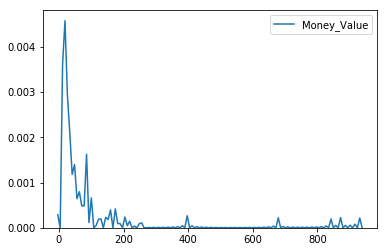

In [9]:
#To replace single missing value in column Money_Value, let's study it's kde
sns.kdeplot(df['Money_Value'])
plt.show()

In [10]:
#Distribution is highly positively skewed. Let's find mean, median & mode
print(df['Money_Value'].describe())
print(df['Money_Value'].mode())

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64
0    0.0
dtype: float64


In [11]:
#Checking count for mode for Money_Value
df[df['Money_Value'] == 0]['Money_Value'].count()

332

In [12]:
#We can see almost 40% of records have same value 0, so we will replace the missing value with Mode i.e. 0
df['Money_Value'].fillna(df['Money_Value'].mode(), inplace = True)

In [18]:
#Studying the pairplot above, we can see that column Detection_Risk take no other values other than 0.5. So, this column is completely useless for us
df.drop('Detection_Risk', axis=1, inplace=True)

In [67]:
#We could also see that few columns have very high correlation between them. Lets' find correlation between all columns
corr = df.corr()

In [68]:
#Dropping few columns that have very high correlation with other columns
for i in corr:
    for j in corr:
        if(i!=j and np.abs(corr[i][j]) >= 0.9):
            df.drop(j, axis=1, inplace=True)

In [69]:
#Checking new DatFrame
df.head(10)

,Sector_score,Score_A,Risk_A,Risk_B,Score_MV,PROB,Prob,Inherent_Risk,CONTROL_RISK,Audit_Risk,...,LOCATION_ID_43,LOCATION_ID_44,LOCATION_ID_5,LOCATION_ID_6,LOCATION_ID_7,LOCATION_ID_8,LOCATION_ID_9,LOCATION_ID_LOHARU,LOCATION_ID_NUH,LOCATION_ID_SAFIDON
0,0.035172,1.0,0.049176,0.000659,0.0,0.0,0.0,0.008969,0.0,0.001493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035172,0.0,0.000000,0.001273,0.0,0.0,0.0,0.001443,0.0,0.000240,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035172,0.0,0.002000,0.000061,0.0,0.0,0.0,0.000185,0.0,0.000031,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035172,0.0,0.000000,0.008540,1.0,0.0,0.0,0.020166,0.0,0.003356,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035172,0.0,0.000000,0.000021,0.0,0.0,0.0,0.000020,0.0,0.000003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.035172,0.0,0.000000,0.000219,0.0,0.0,0.0,0.000945,0.0,0.000157,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.035172,0.5,0.008627,0.003906,1.0,0.0,0.0,0.037974,0.0,0.006320,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.035172,1.0,0.100000,0.009513,0.5,0.0,0.0,0.020796,0.0,0.003461,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.035172,1.0,0.098824,0.008738,0.5,0.0,0.0,0.019761,0.0,0.003289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.035172,1.0,0.046824,0.000261,0.0,0.0,0.0,0.003716,0.0,0.000618,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
#Before running our models, let's normalize our attributes
df = (df-df.min())/(df.max()-df.min())

#Checking the new DataFrame
df.head(10)

,Sector_score,Score_A,Risk_A,Risk_B,Score_MV,PROB,Prob,Inherent_Risk,CONTROL_RISK,Audit_Risk,...,LOCATION_ID_43,LOCATION_ID_44,LOCATION_ID_5,LOCATION_ID_6,LOCATION_ID_7,LOCATION_ID_8,LOCATION_ID_9,LOCATION_ID_LOHARU,LOCATION_ID_NUH,LOCATION_ID_SAFIDON
0,0.035172,1.0,0.049176,0.000659,0.0,0.0,0.0,0.008969,0.0,0.001493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035172,0.0,0.000000,0.001273,0.0,0.0,0.0,0.001443,0.0,0.000240,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035172,0.0,0.002000,0.000061,0.0,0.0,0.0,0.000185,0.0,0.000031,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035172,0.0,0.000000,0.008540,1.0,0.0,0.0,0.020166,0.0,0.003356,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035172,0.0,0.000000,0.000021,0.0,0.0,0.0,0.000020,0.0,0.000003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.035172,0.0,0.000000,0.000219,0.0,0.0,0.0,0.000945,0.0,0.000157,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.035172,0.5,0.008627,0.003906,1.0,0.0,0.0,0.037974,0.0,0.006320,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.035172,1.0,0.100000,0.009513,0.5,0.0,0.0,0.020796,0.0,0.003461,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.035172,1.0,0.098824,0.008738,0.5,0.0,0.0,0.019761,0.0,0.003289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.035172,1.0,0.046824,0.000261,0.0,0.0,0.0,0.003716,0.0,0.000618,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk', axis=1), df['Risk'], test_size=0.3) # 70% training and 30% test

In [50]:
#Initiate LogisticRegression
model = LogisticRegression()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Logisitic Regression model on Training data is", model_train_score)
print("Accuracy of the Logisitic Regression model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Logisitic Regression model on Training data is 0.9042357274401474
Accuracy of the Logisitic Regression model on Testing data is 0.9012875536480687
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.89      0.96      0.92       332
        1.0       0.93      0.82      0.87       211

avg / total       0.91      0.90      0.90       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.88      0.97      0.92       139
        1.0       0.95      0.80      0.87        94

avg / total       0.91      0.90      0.90       233

Confusion matrix is as follows:
 [[135   4]
 [ 19  75]]


In [51]:
#Initialize KNN object with 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9152854511970534
Accuracy of the KNN model on Testing data is 0.871244635193133
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.90      0.97      0.93       332
        1.0       0.95      0.82      0.88       211

avg / total       0.92      0.92      0.91       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.85      0.96      0.90       139
        1.0       0.92      0.74      0.82        94

avg / total       0.88      0.87      0.87       233

Confusion matrix is as follows:
 [[133   6]
 [ 24  70]]


In [52]:
#Initialize KNN object with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9152854511970534
Accuracy of the KNN model on Testing data is 0.871244635193133
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.89      0.98      0.93       332
        1.0       0.97      0.81      0.88       211

avg / total       0.92      0.92      0.91       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.84      0.97      0.90       139
        1.0       0.94      0.72      0.82        94

avg / total       0.88      0.87      0.87       233

Confusion matrix is as follows:
 [[135   4]
 [ 26  68]]


In [53]:
#Initialize KNN object with 1 neighbors
model = KNeighborsClassifier(n_neighbors=1)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 1.0
Accuracy of the KNN model on Testing data is 0.8841201716738197
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       332
        1.0       1.00      1.00      1.00       211

avg / total       1.00      1.00      1.00       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.89      0.91      0.90       139
        1.0       0.87      0.84      0.85        94

avg / total       0.88      0.88      0.88       233

Confusion matrix is as follows:
 [[127  12]
 [ 15  79]]


In [54]:
#Initialize GaussianNB object
model = GaussianNB()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Naive Bayes model on Training data is", model_train_score)
print("Accuracy of the Naive Bayes model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Naive Bayes model on Training data is 0.9447513812154696
Accuracy of the Naive Bayes model on Testing data is 0.9227467811158798
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.95      0.96      0.95       332
        1.0       0.93      0.92      0.93       211

avg / total       0.94      0.94      0.94       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.94      0.94      0.94       139
        1.0       0.90      0.90      0.90        94

avg / total       0.92      0.92      0.92       233

Confusion matrix is as follows:
 [[130   9]
 [  9  85]]


In [58]:
#Let's drop LOCATION_ID attributes & re test our models to see if accuracy improves or not
for i in X_train:
    if i.startswith("LOCATION_ID"):
        X_train.drop(i, axis=1, inplace=True)
        X_test.drop(i, axis=1, inplace=True)

In [59]:
#Initiate LogisticRegression
model = LogisticRegression()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Logisitic Regression model on Training data is", model_train_score)
print("Accuracy of the Logisitic Regression model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Logisitic Regression model on Training data is 0.8784530386740331
Accuracy of the Logisitic Regression model on Testing data is 0.8969957081545065
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.89      0.91      0.90       332
        1.0       0.86      0.82      0.84       211

avg / total       0.88      0.88      0.88       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.89      0.94      0.92       139
        1.0       0.91      0.83      0.87        94

avg / total       0.90      0.90      0.90       233

Confusion matrix is as follows:
 [[131   8]
 [ 16  78]]


In [60]:
#Initialize KNN object with 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9705340699815838
Accuracy of the KNN model on Testing data is 0.9785407725321889
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       332
        1.0       0.99      0.94      0.96       211

avg / total       0.97      0.97      0.97       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       139
        1.0       0.98      0.97      0.97        94

avg / total       0.98      0.98      0.98       233

Confusion matrix is as follows:
 [[137   2]
 [  3  91]]


In [61]:
#Initialize KNN object with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 0.9668508287292817
Accuracy of the KNN model on Testing data is 0.9699570815450643
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       332
        1.0       0.98      0.93      0.96       211

avg / total       0.97      0.97      0.97       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       139
        1.0       0.98      0.95      0.96        94

avg / total       0.97      0.97      0.97       233

Confusion matrix is as follows:
 [[137   2]
 [  5  89]]


In [62]:
#Initialize KNN object with 1 neighbors
model = KNeighborsClassifier(n_neighbors=1)

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the KNN model on Training data is", model_train_score)
print("Accuracy of the KNN model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the KNN model on Training data is 1.0
Accuracy of the KNN model on Testing data is 0.9656652360515021
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       332
        1.0       1.00      1.00      1.00       211

avg / total       1.00      1.00      1.00       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.97      0.97      0.97       139
        1.0       0.96      0.96      0.96        94

avg / total       0.97      0.97      0.97       233

Confusion matrix is as follows:
 [[135   4]
 [  4  90]]


In [63]:
#Initialize GaussianNB object
model = GaussianNB()

#Fit the model on training data
model.fit(X_train, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

#Print Accuracy
print("Accuracy of the Naive Bayes model on Training data is", model_train_score)
print("Accuracy of the Naive Bayes model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Naive Bayes model on Training data is 0.9815837937384899
Accuracy of the Naive Bayes model on Testing data is 0.9656652360515021
Classification Report for Training data is:
              precision    recall  f1-score   support

        0.0       1.00      0.97      0.98       332
        1.0       0.96      1.00      0.98       211

avg / total       0.98      0.98      0.98       543

Classification Report for Testing data is:
              precision    recall  f1-score   support

        0.0       0.99      0.96      0.97       139
        1.0       0.94      0.98      0.96        94

avg / total       0.97      0.97      0.97       233

Confusion matrix is as follows:
 [[133   6]
 [  2  92]]


# Conclusion:
For above data for predicting Risky vs Non-risky Firms, after processing data, it appears, Naive Bayes would be the best model to predict the Risky vs Non-risky Firms.

This might be because, we removed correlated attributes so that we are left with only independent variables.

We were getting an accuracy of over 92% which seemed to be good but we tried dropping LOCATION_ID attribute & that significantly improved the performance for KNN & also for Naive Bayes but slightly deteriorated it for Logistic Regression.

So, KNN appeared to be the new winner with K=3 with an excellent accuracy of over 97%!